# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Ridha
- **Email:** ridhauwu@gmail.com
- **ID Dicoding:** muridha

## Menentukan Pertanyaan Bisnis

- Pada hari apa saja dalam seminggu konsumen Brasil cenderung melakukan belanja online? Dan pada hari apa penjual harus melakukan penambahan?
- apa saja kategori produk yang paling diminati customer brazil?
- apa metode pembayaran paling favorit dan paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [12]:
customer_df = pd.read_csv('./data/customers_dataset.csv')
orders_df = pd.read_csv('./data/orders_dataset.csv')
order_items_df = pd.read_csv('./data/order_items_dataset.csv')
order_payments_df = pd.read_csv('./data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('./data/order_reviews_dataset.csv')
sellers_df = pd.read_csv('./data/sellers_dataset.csv')
products_df = pd.read_csv('./data/products_dataset.csv')
geolocation_df = pd.read_csv('./data/geolocation_dataset.csv')
translation_df = pd.read_csv('./data/product_category_name_translation.csv')

### Assessing Data

CUSTOMER_DF

In [13]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [16]:
customer_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
print('jumlah nilai duplikasi: {}'.format(customer_df.duplicated().sum()))

jumlah nilai duplikasi: 0


ORDERS_DF

In [18]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [19]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


fungsi .describe() tidak bekerja karena beberapa kolom masih dalam bentuk objek,dan harus di ubah menjadi datetime(bukan date)

In [20]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [21]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

nilai yang missing, apakah karena customer tidak membayar ataukah pembayaran tidak tercatat/gagal ?

- Apakah kecepatan pengiriman lebih cepat dari yang diharapkan? (mungkin tergantung jarak antara penjual dan pelanggan)

In [22]:
print('jumlah duplikasi: {}'.format(orders_df.duplicated().sum()))

jumlah duplikasi: 0


ORDER_ITEM_DF

In [23]:
order_items_df.head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [24]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


jika suatu order memiliki lebih dari 1 item maka nilai total freight akan dikali jumlah item dengan nilai freight(harga pengiriman).

In [25]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [26]:
print('jumlah duplikasi: {}'.format(order_items_df.duplicated().sum()))

jumlah duplikasi: 0


masalah pada dataframe ORDER_ITEMS_DF: 
- nilai freight total masih belum jelas(nilai freight_total = jumlah item * nilai freight item)
- order_item_id: merupakan jumlah item yang berada di dalam satu order

ORDER_PAYMENTS_DF

In [27]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


seorang cutomer bisa saja membayar sebuah order dengan beberapa metode pembayaran, jika terdapat beberapa metode pembayaran maka sebuah sequence akan terbentuk.

In [28]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [29]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [30]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [31]:
print('jumlah duplikasi: {}'.format(order_payments_df.duplicated().sum()))

jumlah duplikasi: 0


ORDER_REVIEWS_DF

In [32]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [33]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


terdapat kesalahan pada tipe data 'review_creation_date' dan 'review_answer_timestamp'

In [34]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

- judul review apa yang cocok untuk mengisi kekosongan ?, apa maksud dari customer?
- beberapa terdapat umpan balik pertanyaan?, mengapa demikian

In [35]:
print('jumlah duplikasi: {}'.format(order_reviews_df.duplicated().sum()))

jumlah duplikasi: 0


PRODUCTS_DF

In [36]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- terdapat typo di title kolom 'product_name_lenght' dan 'product_description_lenght'.

In [37]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [38]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [39]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

- terdapat missing value!!!

In [40]:
print('jumlah duplikasi: {}'.format(products_df.duplicated().sum()))

jumlah duplikasi: 0


SELLERS_DF

In [41]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [42]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [43]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [44]:
print('jumlah duplikasi: {}'.format(sellers_df.duplicated().sum()))

jumlah duplikasi: 0


GEOLOCATION_DF

In [45]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [46]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [47]:
print('jumlah duplikasi: {}'.format(geolocation_df.duplicated().sum()))

jumlah duplikasi: 261831


- banyak duplikasi data!

### Cleaning Data

membersihkan data orders_df:
- konversi tipe objek ke datetime

In [48]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [49]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [50]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


membersihkan data order_items_df:
- mengubah tipe object menjadi datetime pada kolom 'shipping_limit_date'
- menambahkan kolom 'total_item_value' -> jumlah item * harga item
- menambahkan kolom 'total_freight_value' -> jmlah item * harga kirim peritem
- menambahkan kolom 'total_order_value' -> total harga item + total harga kirim item

In [51]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [52]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [53]:
order_items_df['total_item_value'] = order_items_df['order_item_id'] * order_items_df['price']
order_items_df['total_freight_value'] = order_items_df['order_item_id'] * order_items_df['freight_value']
order_items_df['total_order_value'] = order_items_df['total_item_value'] + order_items_df['total_freight_value']

In [54]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_item_value,total_freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04


In [55]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value,total_item_value,total_freight_value,total_order_value
count,112650.000000,112650,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320,136.686539,23.617636,160.304175
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,0.850000,0.000000,6.080000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000,45.000000,13.740000,61.070000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000,84.495000,17.250000,103.550000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000,149.900000,24.960000,175.870000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,13440.000000,1794.960000,13664.080000
std,0.705124,NaN,183.633928,15.806405,217.468683,25.118779,228.532489


data order_payments_df tidak ada anomali

In [56]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


membersihkan data order_reviews_df:
- tipe data yang kurang tepat
- dropping data null

In [57]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [58]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


membersihkan data products_df:
- rename nama kolom

In [59]:
products_df = products_df.rename(columns = {'product_name_lenght':'product_name_length', 'product_description_lenght':'product_description_length'})

In [60]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


sellers_df bersih

geolocation_df termasuk bersih karena bisa saja ada toko yang berdekatan dan di kota yang sama

translation_df juga bersih

## Exploratory Data Analysis (EDA)

### Explore ...

kita akan me merge semua data frame yang ada menjadi data frame saja sehingga memudahkan dalam melakukan eksplorasi

In [61]:
df = pd.merge(orders_df,order_payments_df, on="order_id")

In [62]:
df = df.merge(customer_df, on="customer_id")
df = df.merge(order_items_df, on="order_id")
df = df.merge(products_df, on="product_id")
df = df.merge(translation_df, on="product_category_name")

In [63]:
# drop nilai null
df.dropna(inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113367 entries, 0 to 115877
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113367 non-null  object        
 1   customer_id                    113367 non-null  object        
 2   order_status                   113367 non-null  object        
 3   order_purchase_timestamp       113367 non-null  datetime64[ns]
 4   order_approved_at              113367 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113367 non-null  datetime64[ns]
 6   order_delivered_customer_date  113367 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113367 non-null  datetime64[ns]
 8   payment_sequential             113367 non-null  int64         
 9   payment_type                   113367 non-null  object        
 10  payment_installments           113367 non-null  int64         
 11  payme

In [65]:
df.isnull().sum().sort_values()

order_id                         0
product_height_cm                0
product_length_cm                0
product_weight_g                 0
product_photos_qty               0
product_description_length       0
product_name_length              0
product_category_name            0
total_order_value                0
total_freight_value              0
total_item_value                 0
freight_value                    0
price                            0
shipping_limit_date              0
seller_id                        0
product_id                       0
order_item_id                    0
customer_state                   0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
product_width_cm                 0
order_estimated_delivery_date    0
payment_type                     0
payment_installments             0
payment_value       

In [66]:
#mengecek konsistemnsi df
df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,total_order_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
114667,a140c8837fe93faea735fdb258215911,9151b134d8f0f1b7b46d3c9003ad599f,delivered,2018-03-13 13:58:19,2018-03-13 14:15:38,2018-03-20 23:24:45,2018-04-03 02:52:50,2018-04-03,1,credit_card,...,591.87,alimentos_bebidas,46.0,553.0,2.0,9550.0,57.0,40.0,25.0,food_drink
47728,880769ba72966e66d6e8e1f1152a0d36,7742c0111a713083af57f1c9961023d5,delivered,2018-06-10 16:14:03,2018-06-11 16:31:49,2018-06-12 17:05:00,2018-06-19 16:55:40,2018-06-29,1,credit_card,...,87.50,cama_mesa_banho,60.0,289.0,2.0,1150.0,30.0,10.0,30.0,bed_bath_table
96960,f7666cba3dd9242a500443d3a1c9ad46,a9eb02e9f40e3a259d1f75a63cdc0bf6,delivered,2017-11-08 23:42:09,2017-11-10 16:33:24,2017-11-14 16:02:15,2017-11-22 18:22:54,2017-12-08,1,credit_card,...,90.73,esporte_lazer,43.0,1646.0,6.0,491.0,19.0,12.0,16.0,sports_leisure
94771,4273d1dff20ccc8e3abbbb34e4a50b62,961d8f488fd6ef4865acedb34a9cecc4,delivered,2018-01-06 01:06:31,2018-01-06 01:15:29,2018-01-08 19:53:06,2018-01-16 12:42:44,2018-02-07,1,credit_card,...,152.99,esporte_lazer,26.0,438.0,1.0,757.0,22.0,6.0,20.0,sports_leisure
53644,7a5133e37b23788a1c14302332ad39a1,892448a24872aecc5756ec5626a3afc4,delivered,2018-04-30 22:18:55,2018-05-01 03:32:38,2018-05-02 11:53:00,2018-05-03 18:32:21,2018-05-11,1,credit_card,...,34.39,cama_mesa_banho,58.0,362.0,1.0,200.0,26.0,6.0,19.0,bed_bath_table
59378,0ff35367e334d813e6430388f6769dc3,2283082a4205df69547d4916bc5d2f39,delivered,2018-06-04 08:43:48,2018-06-05 04:52:01,2018-06-05 14:59:00,2018-06-07 03:03:47,2018-06-28,1,boleto,...,33.28,construcao_ferramentas_construcao,44.0,339.0,1.0,450.0,19.0,5.0,13.0,construction_tools_construction
96314,31f1be86be8795e41ef55b592873ae37,c3189548cd373b2d1f4d190e5008fe7b,delivered,2018-07-23 20:51:50,2018-07-24 10:31:38,2018-07-24 15:30:00,2018-07-30 20:16:20,2018-08-14,1,credit_card,...,234.31,esporte_lazer,44.0,461.0,1.0,5100.0,60.0,30.0,30.0,sports_leisure
91217,bdf2b8212af123f029e70c1036e2895e,579e6c506a2eb334f56576b996e356c2,delivered,2018-04-26 16:30:26,2018-04-26 17:10:30,2018-04-30 13:42:00,2018-05-10 20:56:47,2018-05-24,1,credit_card,...,221.82,climatizacao,56.0,671.0,4.0,8750.0,25.0,25.0,25.0,air_conditioning
53663,fb1d2527c581c02fc24ea10dd0a0a012,f5af2c8493bd063c294630568319b6fe,delivered,2017-07-05 21:55:10,2017-07-05 22:05:24,2017-07-17 10:52:38,2017-07-25 19:22:46,2017-08-08,1,credit_card,...,44.59,cama_mesa_banho,45.0,112.0,1.0,450.0,40.0,4.0,30.0,bed_bath_table
31905,ad4f45ebcf8664ef5e1bb5073359f9f1,034b85c0cd0d7d391cd93e2857f773be,delivered,2017-07-19 14:44:05,2017-07-19 15:10:27,2017-07-25 22:48:22,2017-08-01 18:52:22,2017-08-17,1,voucher,...,77.57,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0,garden_tools


Mari kita lihat evolusi e-niaga dari waktu ke waktu dari tahun 2016 hingga 2018 di Brasil.

Text(0.5, 1.0, 'Years')

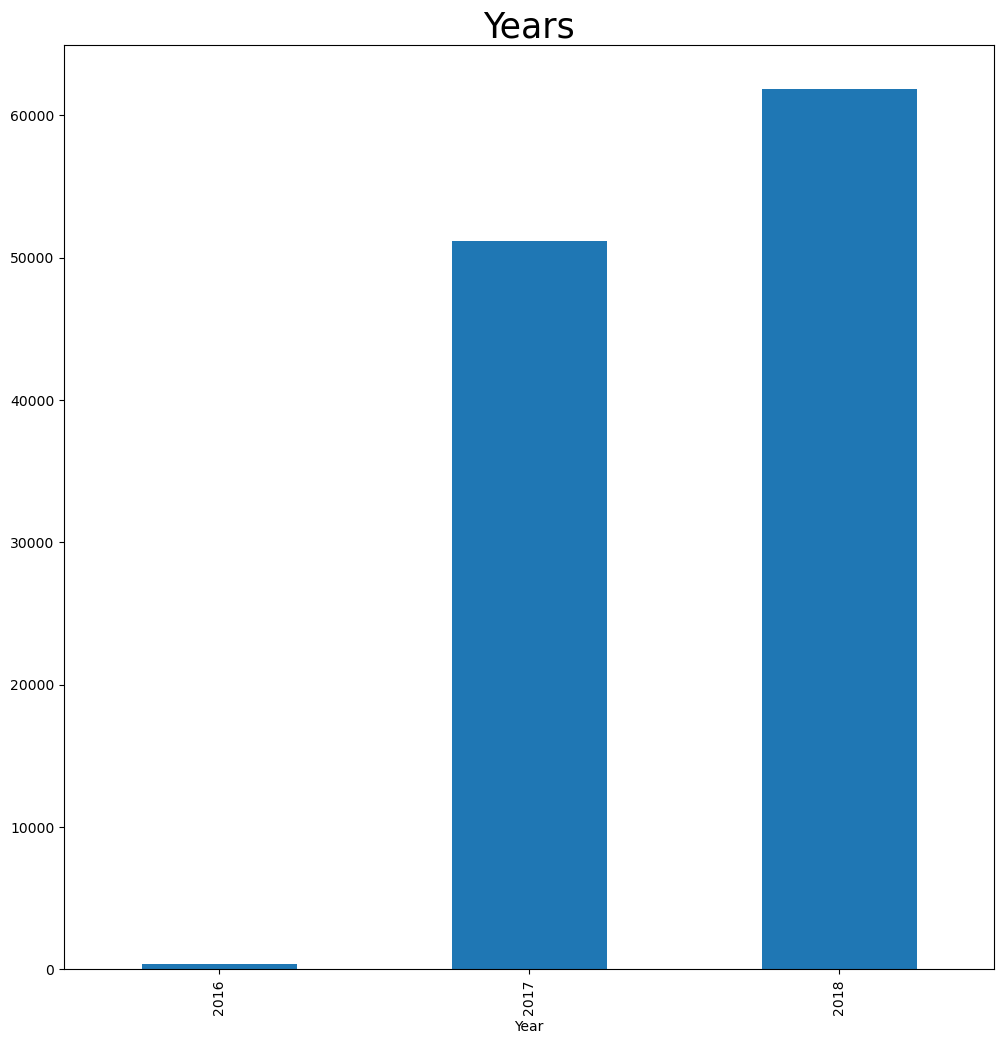

In [67]:
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind = 'bar',
    figsize=(12,12),  
)
plt.title('Years',fontsize=25)

Text(0.5, 1.0, 'Years')

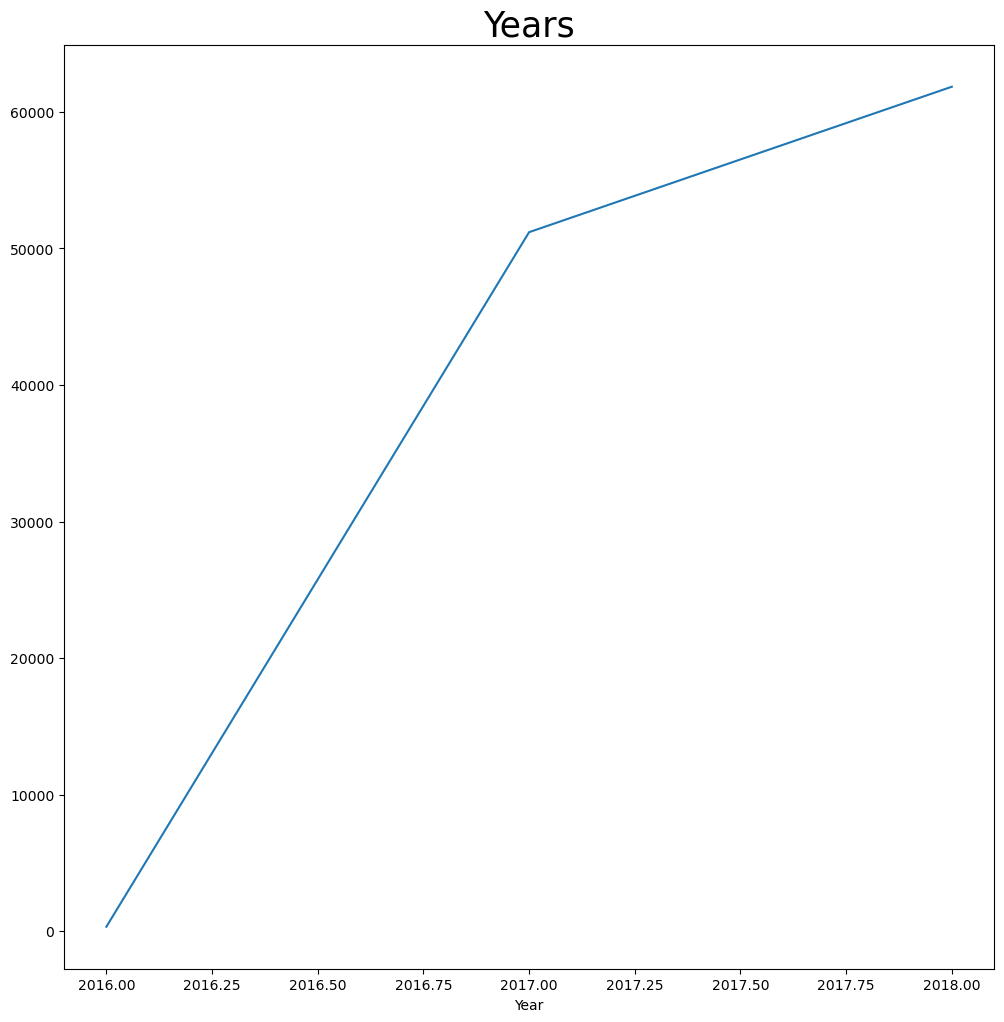

In [68]:
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind = 'line',
    figsize=(12,12)
)
plt.title('Years',fontsize=25)

Jelas terlihat adanya lompatan besar dari tahun 2016 ke 2017. Namun pertumbuhan dari tahun 2017 ke 2018 cukup stabil.

Mari kita lihat pembelian online per bulan satu per satu.

Text(0.5, 1.0, 'Months')

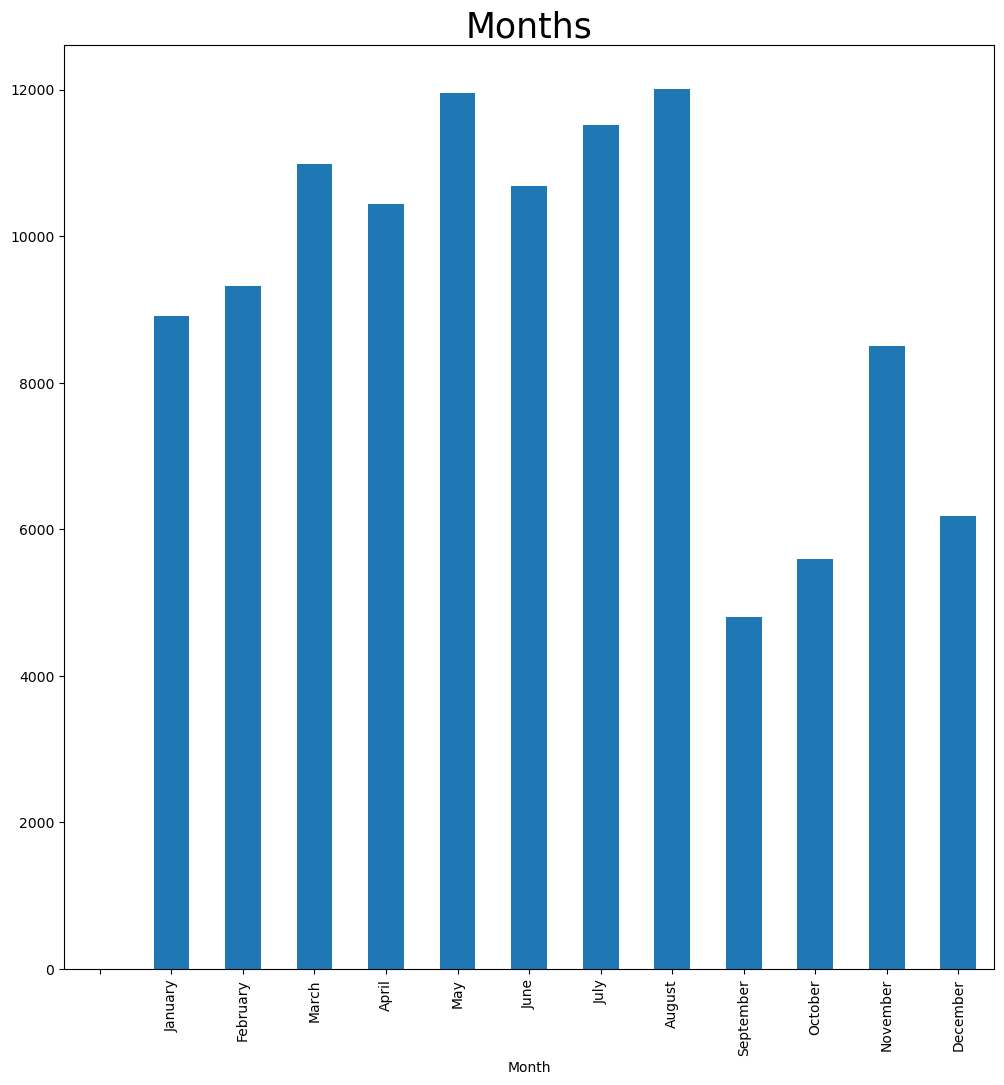

In [69]:
df['Month'] =  pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.month_name(), categories=list(calendar.month_name)))
df['Month']
df.groupby('Month', observed=False).size().plot(
    kind = 'bar',
    figsize=(12,12)
)
plt.title('Months',fontsize=25)

Saya memperkirakan November (diskon Black Friday) atau Desember (natal) memiliki nilai tertinggi. Hal ini bisa terjadi karena seluruh data tidak digunakan atau ada peristiwa yang lebih penting pada bulan-bulan lain di Brasil.

Pada bagian berikut ini, bulan dan tahun digabungkan. Akan sangat bermanfaat untuk mengamati bulan-bulan dalam setiap tahun secara bersamaan.

In [70]:
df['MonthY'] = df['order_purchase_timestamp'].dt.strftime('%b%Y')
df['MonthY']

0         Oct2017
1         Oct2017
2         Oct2017
3         Aug2017
4         Aug2017
           ...   
115873    Aug2018
115874    Jul2018
115875    Jul2018
115876    Jan2017
115877    Sep2017
Name: MonthY, Length: 113367, dtype: object

<Axes: xlabel='MonthY'>

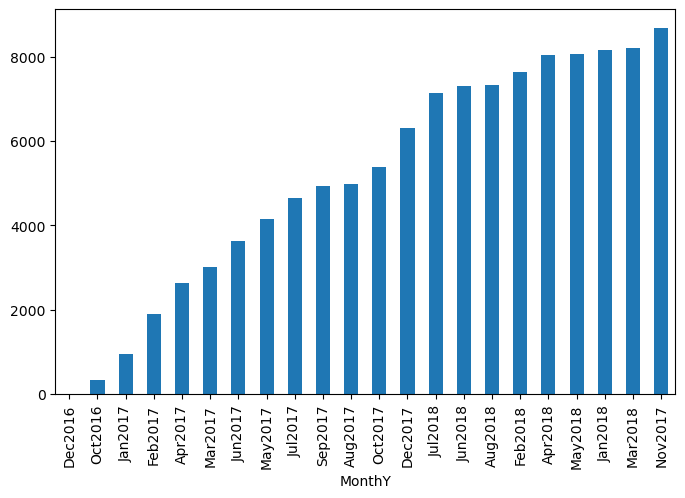

In [71]:
df.groupby('MonthY').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)

Text(0.5, 1.0, 'Month_Year')

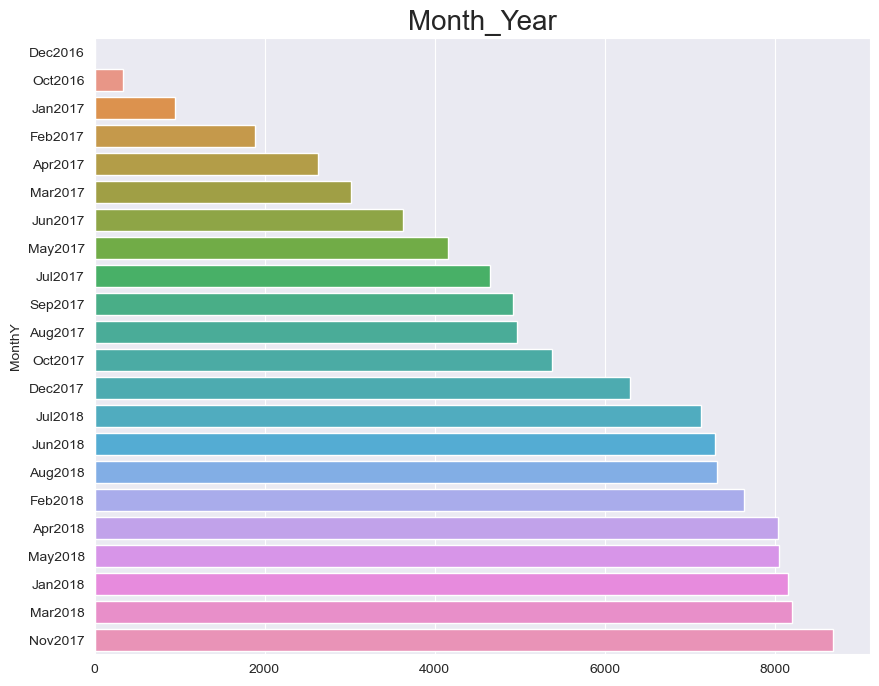

In [73]:
Month_Year = df.groupby('MonthY').size().sort_values()

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=Month_Year.index, x=Month_Year.values)
plt.title('Month_Year',fontsize=20)

Ada baiknya untuk mengetahui pada hari apa dalam seminggu, orang Brasil menghabiskan lebih banyak waktu untuk belanja online. Hal ini membantu reseller untuk menawarkan promosi pada waktu yang tepat.

<Axes: xlabel='Day'>

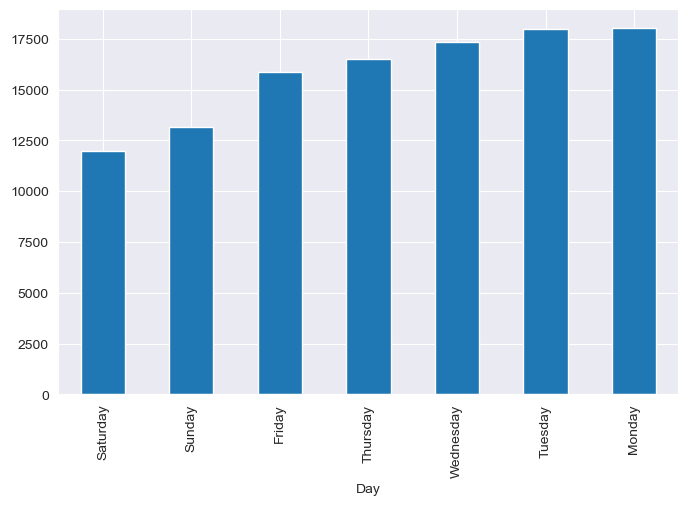

In [74]:
df['Day'] = pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.day_name(), categories=list(calendar.day_name)))
df.groupby('Day', observed=False).size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)

Text(0.5, 1.0, 'Days')

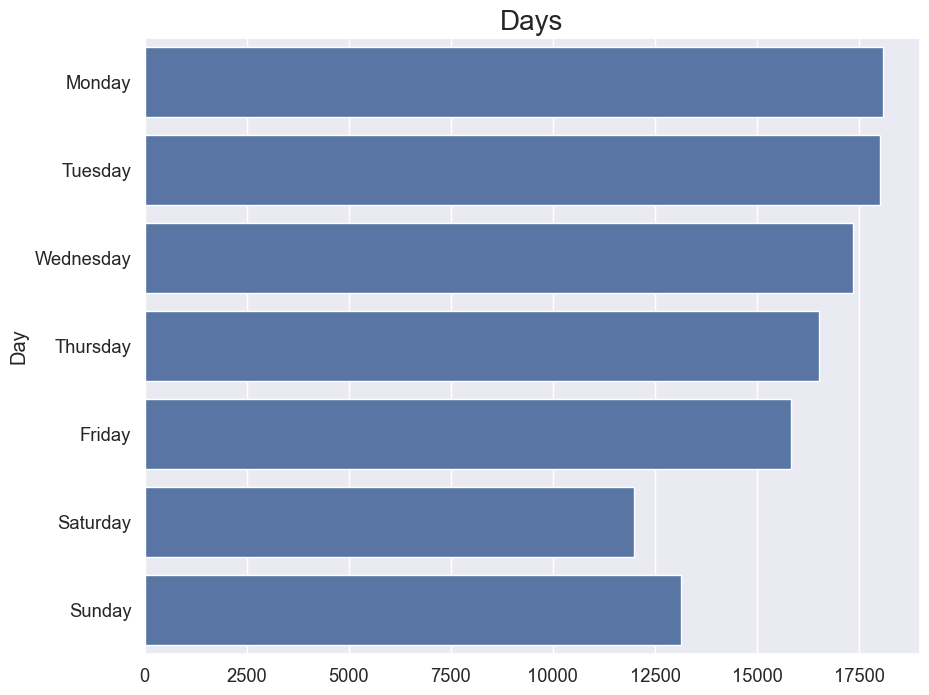

In [273]:
 day = df.groupby('Day', observed=False).size().sort_values()

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=day.index, x=day.values)
plt.title('Days',fontsize=20)


Kita dapat melihat lebih banyak belanja online terjadi pada hari kerja dan lebih sedikit pada akhir pekan.

10 PRODUK TERATAS

Tidak ada nama untuk item dalam dataset, setiap item memiliki item_id. Oleh karena itu saya menghubungkan setiap item berdasarkan kategori yang dimilikinya. Di bawah ini diperoleh 10 kategori populer teratas

Text(0.5, 1.0, 'Top 10 product category')

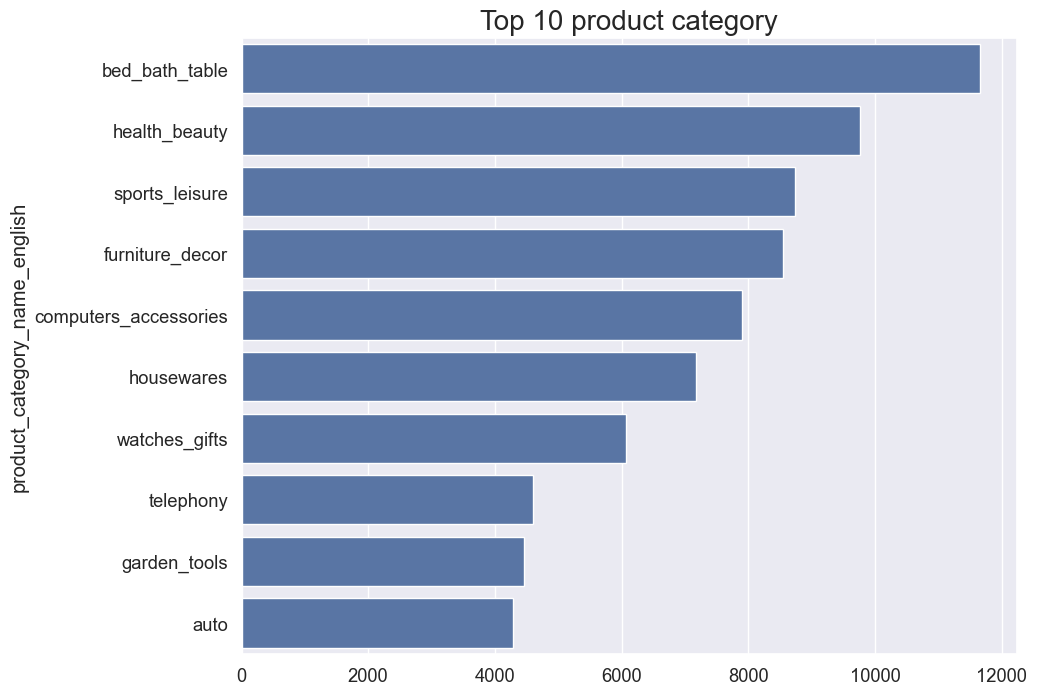

In [274]:
top_10_category = df["product_category_name_english"].value_counts().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=top_10_category.index, x=top_10_category.values)
plt.title('Top 10 product category',fontsize=20)

In [275]:
top_10_category

product_category_name_english
bed_bath_table           11649
health_beauty             9761
sports_leisure            8731
furniture_decor           8553
computers_accessories     7897
housewares                7172
watches_gifts             6063
telephony                 4601
garden_tools              4463
auto                      4283
Name: count, dtype: int64

Harga rata-rata pada setiap kategori:

Text(0.5, 1.0, 'average_price')

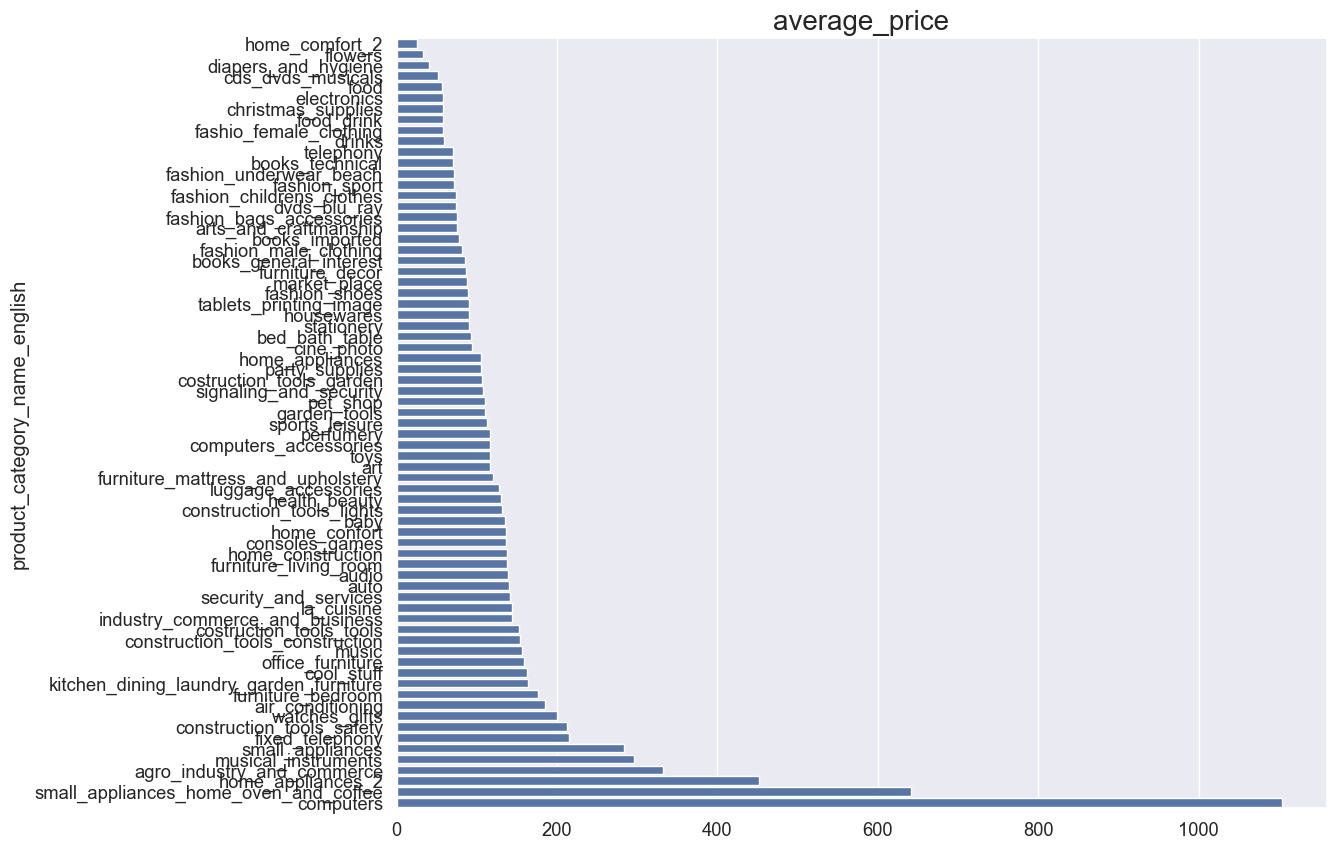

In [276]:
average_price = df.groupby("product_category_name_english")["price"].agg('mean').sort_values()
average_price 
fig=plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.barplot(y=average_price.index, x=average_price.values)
plt.title('average_price',fontsize=20)

In [277]:
average_price.sample(10)

product_category_name_english
furniture_mattress_and_upholstery    119.779500
consoles_games                       136.922809
furniture_decor                       87.191488
baby                                 135.102080
party_supplies                       105.226444
signaling_and_security               107.490603
agro_industry_and_commerce           332.835691
costruction_tools_tools              153.075238
cds_dvds_musicals                     52.142857
fashion_bags_accessories              75.432422
Name: price, dtype: float64

Harga rata-rata dari 'Kategori 10 Teratas' :

In [278]:
top_category = df[df['product_category_name_english'].isin(top_10_category.index)]
price_top_category=round(top_category.groupby("product_category_name_english")["price"].agg('mean').sort_values(ascending=False), 2)
price_top_category

product_category_name_english
watches_gifts            200.09
auto                     140.76
health_beauty            130.25
computers_accessories    116.35
sports_leisure           113.44
garden_tools             110.30
bed_bath_table            92.53
housewares                90.38
furniture_decor           87.19
telephony                 70.73
Name: price, dtype: float64

Text(0.5, 1.0, 'average_price')

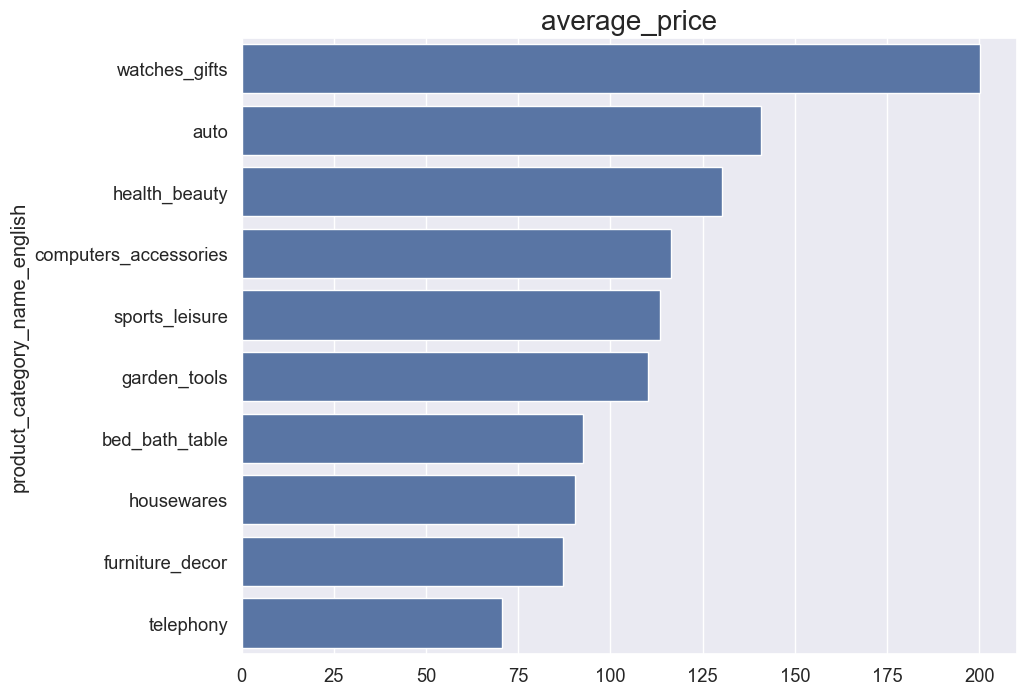

In [279]:
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=price_top_category.index, x=price_top_category.values)
plt.title('average_price',fontsize=20)

Text(0.5, 1.0, 'Average Price')

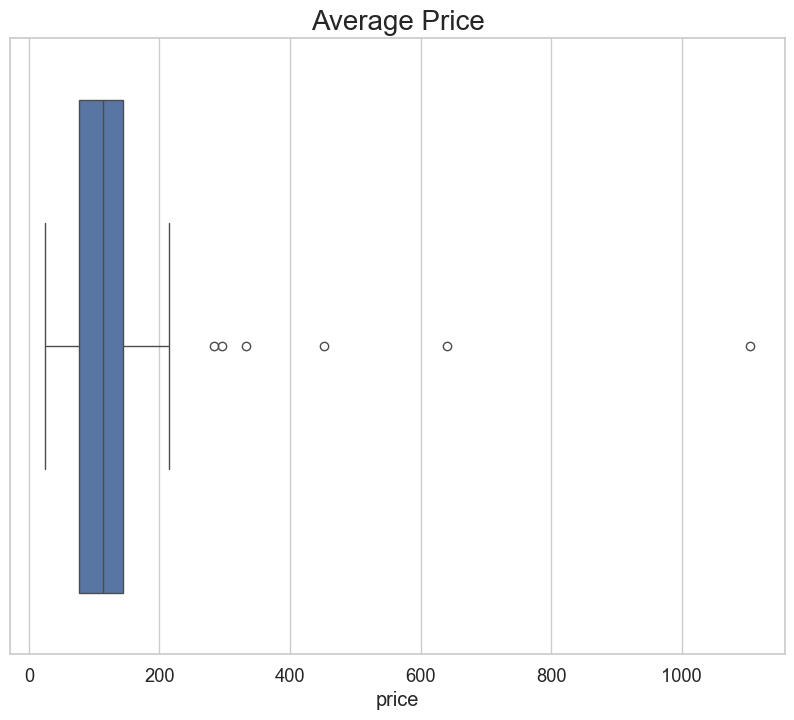

In [280]:
fig=plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.boxplot(x=average_price)
plt.title('Average Price',fontsize=20)

Text(0.5, 1.0, 'Top Categories Average Price')

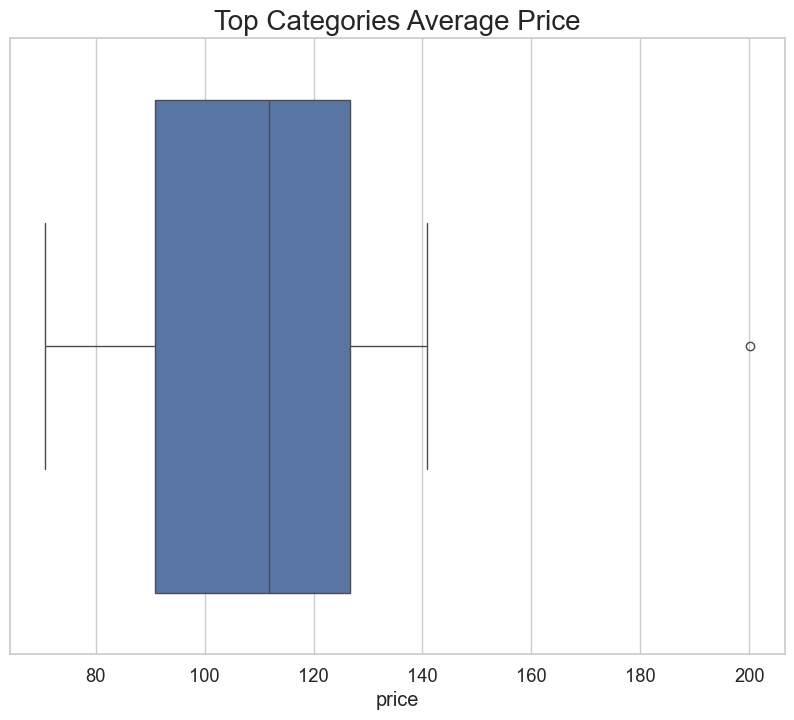

In [281]:
fig=plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.boxplot(x=price_top_category)
plt.title('Top Categories Average Price',fontsize=20)

PAYMENTS

In [282]:
df.payment_type.sample(15)

32583     credit_card
53946     credit_card
85719     credit_card
58313     credit_card
64451     credit_card
34851     credit_card
155       credit_card
56728     credit_card
24389     credit_card
49172     credit_card
25257     credit_card
95475     credit_card
7354      credit_card
105070         boleto
101561        voucher
Name: payment_type, dtype: object

In [283]:
#jumlah metode bayar
print('jumlah metode bayar: {}'.format(df.payment_type.nunique()))

jumlah metode bayar: 4


In [284]:
print('berikut metode bayarnya: {}'.format(df.payment_type.unique()))

berikut metode bayarnya: ['credit_card' 'voucher' 'boleto' 'debit_card']


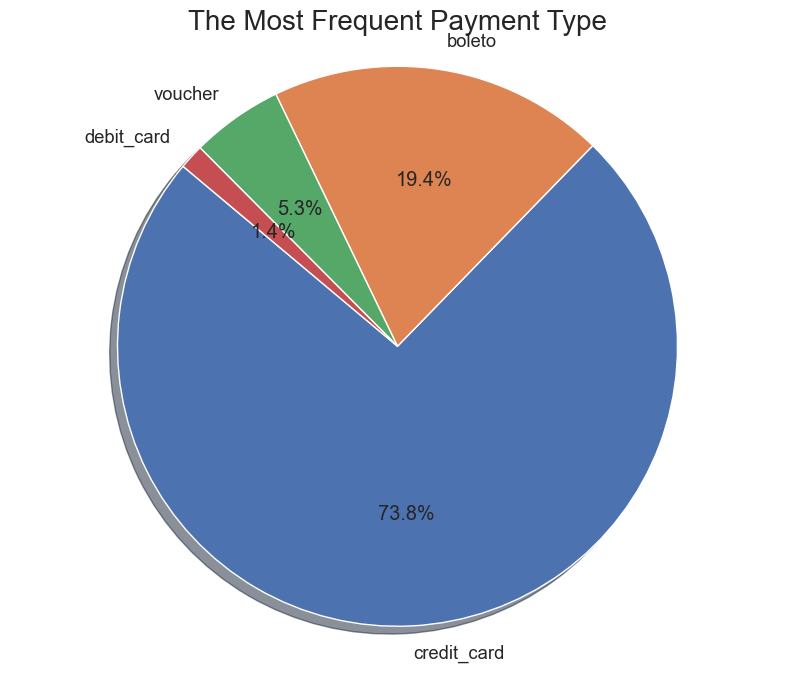

In [285]:
sns.set_style("whitegrid")

payment_counts = df["payment_type"].value_counts()

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.color_palette("pastel")
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=140, shadow=True)
plt.title('The Most Frequent Payment Type'.title(), fontsize=20)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Axes: xlabel='Year,payment_type'>

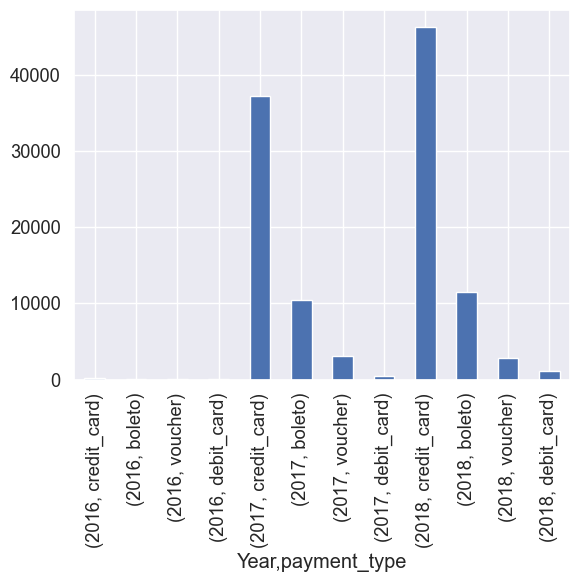

In [286]:
df.groupby("Year")['payment_type'].value_counts().plot(kind='bar')

Metode pembayaran yang paling banyak digunakan adalah Kartu Kredit.
Bolto bancário adalah metode pembayaran berbasis uang tunai paling populer di Brasil yang hampir bebas dari penipuan. Metode pembayaran ini menghasilkan lebih dari 3,7 miliar transaksi per tahun dan mendominasi 25% dari semua transaksi pembayaran online.

CUSTOMERS

In [287]:
top_states = df["customer_state"].value_counts()
top_states

customer_state
SP    47819
RJ    14648
MG    13230
RS     6282
PR     5790
SC     4161
BA     3858
DF     2389
GO     2319
ES     2288
PE     1803
CE     1482
PA     1070
MT     1067
MS      826
MA      808
PB      614
RN      555
PI      546
AL      437
SE      384
TO      330
RO      275
AM      167
AC       92
AP       83
RR       44
Name: count, dtype: int64

Text(0.5, 1.0, 'states')

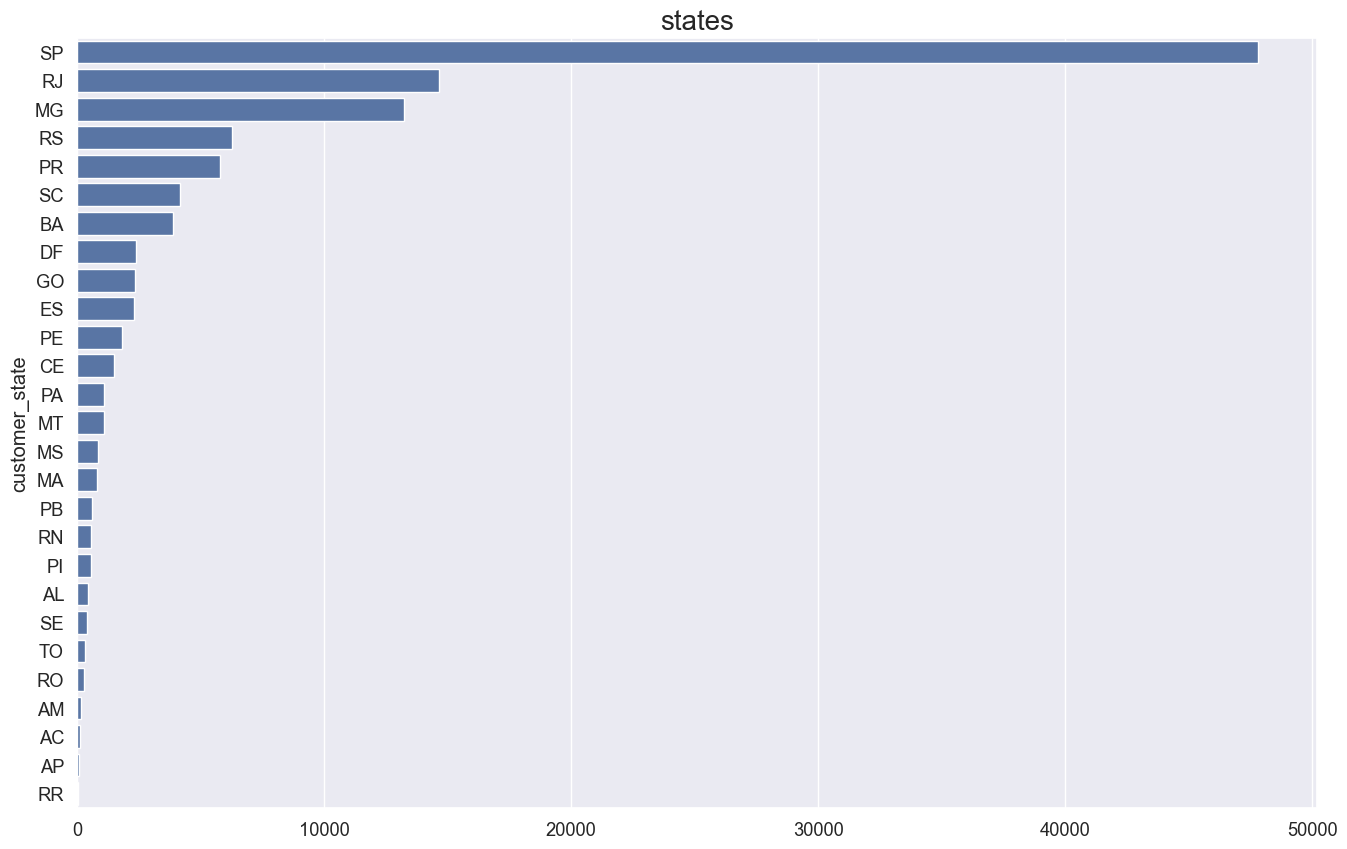

In [288]:
fig=plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.barplot(y=top_states.index, x=top_states.values)
plt.title('states',fontsize=20)

Sebagian besar pelanggan berasal dari Sao Paulo, diikuti oleh Rio de Janeiro.
- derivery_time:Waktu antara tanggal pembelian dan sampai ke tujuan

<Axes: xlabel='customer_state'>

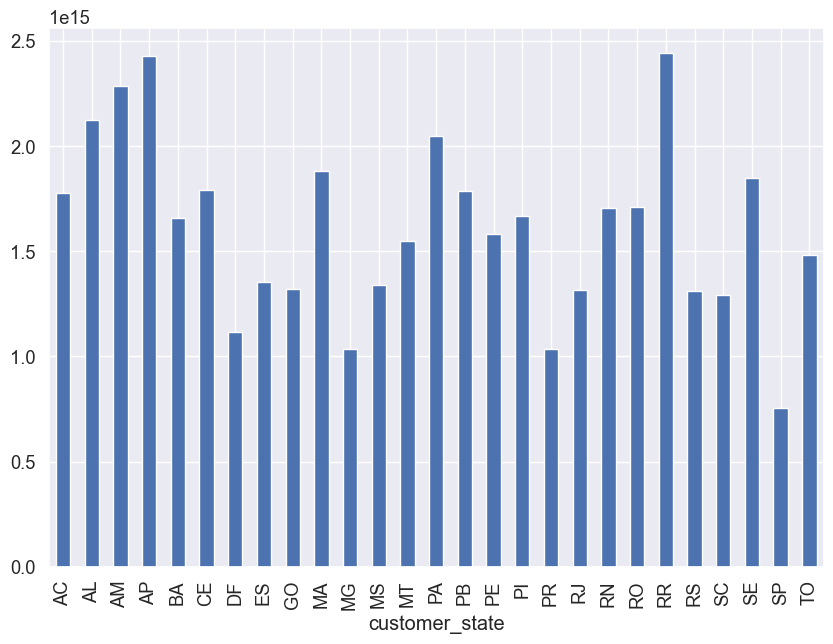

In [289]:
df['derivery_time'] = df['order_delivered_customer_date'].astype(int)- df['order_purchase_timestamp'].astype(int)

delivery_per_state = df.groupby("customer_state")['derivery_time'].mean()
delivery_per_state.plot(
    kind='bar',
    figsize=(10,7)
)

Waktu pengiriman paling lama adalah milik Negara bagian Paraiba. Kami tidak memiliki set data penjual di sini untuk membandingkan jarak antara asal (lokasi penjual) dan tujuan (lokasi pembeli).


KORELASI ANTAR KOLOM/FAKTOR
- korelasi menunjukkan adanya saling ketergantungan antara dua variabel atau lebih. Nilai korelasi terletak antara -1 dan 1(korelasi bukan berarti sebab-akibat)

In [290]:
#This function colours values.
def adding_colour(val):
  if val < 0:
    color = 'red'
  elif val < 1:
    color = 'green'
  else:
    color = 'black'      
  return 'color: %s' % color

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
styled_corr = corr.style.map(adding_colour)

styled_corr

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,total_item_value,total_freight_value,total_order_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Year,derivery_time
payment_sequential,1.000000,-0.087636,-0.065092,-0.028489,-0.000320,0.000263,0.008459,0.000261,0.003048,0.000583,-0.001524,-0.010569,-0.008694,0.026018,0.030589,0.020725,0.030398,-0.043490,0.003093
payment_installments,-0.087636,1.000000,0.274281,0.057973,0.074173,0.279455,0.186467,0.268402,0.170292,0.274112,0.020894,0.036633,-0.000140,0.179123,0.116260,0.120540,0.136901,-0.050385,0.044075
payment_value,-0.065092,0.274281,1.000000,0.053122,0.266621,0.736578,0.372554,0.884935,0.451050,0.891630,0.004857,0.157190,0.010524,0.305568,0.138097,0.216583,0.148412,0.005173,0.059970
customer_zip_code_prefix,-0.028489,0.057973,0.053122,1.000000,0.000096,0.041988,0.225342,0.039641,0.169266,0.056319,0.015727,0.024201,0.020937,0.001095,0.003634,0.011632,-0.010012,-0.034051,0.271203
order_item_id,-0.000320,0.074173,0.266621,0.000096,1.000000,-0.060447,-0.030354,0.197933,0.466579,0.239610,-0.022327,-0.013924,-0.053845,-0.003713,0.005238,0.030102,-0.009827,0.003946,-0.016317
price,0.000263,0.279455,0.736578,0.041988,-0.060447,1.000000,0.414941,0.891212,0.253014,0.875844,0.019762,0.200803,0.053147,0.339658,0.142934,0.222948,0.173005,-0.001062,0.061150
freight_value,0.008459,0.186467,0.372554,0.225342,-0.030354,0.414941,1.000000,0.372604,0.741382,0.436014,0.025235,0.094763,0.022578,0.612538,0.304098,0.391665,0.322947,0.036205,0.213206
total_item_value,0.000261,0.268402,0.884935,0.039641,0.197933,0.891212,0.372604,1.000000,0.394334,0.994890,0.012666,0.184468,0.033333,0.316191,0.137146,0.214144,0.158669,-0.001392,0.055023
total_freight_value,0.003048,0.170292,0.451050,0.169266,0.466579,0.253014,0.741382,0.394334,1.000000,0.485106,0.005388,0.062142,-0.013324,0.455462,0.229311,0.319371,0.229742,0.029634,0.150882
total_order_value,0.000583,0.274112,0.891630,0.056319,0.239610,0.875844,0.436014,0.994890,0.485106,1.000000,0.012645,0.182361,0.030255,0.350918,0.155698,0.238862,0.176226,0.001931,0.068936


Korelasi antara nilai ongkos angkut dan harga barang:

In [291]:
round(df['freight_value'].corr(df['price']), 2)

0.41

<Axes: xlabel='price', ylabel='freight_value'>

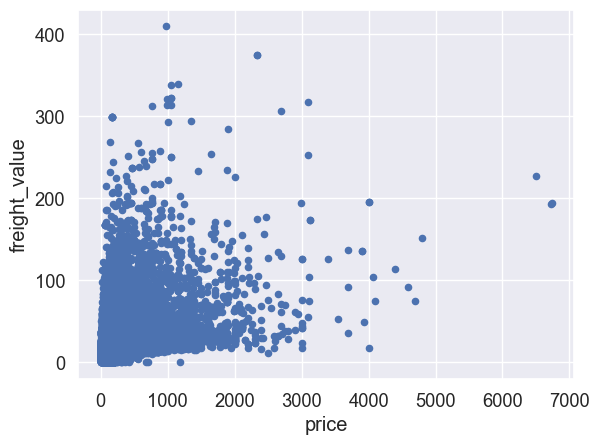

In [292]:
df.plot(
    kind = 'scatter',
    x = 'price',
    y = 'freight_value',
)

korelasi antara ongkos kirim dan berat barang

In [293]:
round(df['freight_value'].corr(df['product_weight_g']), 2)

0.61

<Axes: xlabel='product_weight_g', ylabel='freight_value'>

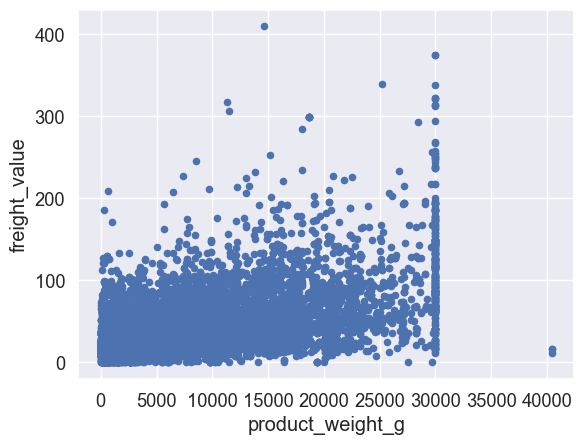

In [294]:
df.plot(
    kind = 'scatter',
    x = 'product_weight_g',
    y = 'freight_value',
)

Ada korelasi sedang antara nilai pengiriman, harga barang, dan berat barang.

Covariance

In [295]:
numeric_df = df.select_dtypes(include=['number'])
cov = numeric_df.cov()
styled_cov = cov.style.map(add_colour)
styled_cov

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,total_item_value,total_freight_value,total_order_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Year,derivery_time
payment_sequential,0.465288,-0.166055,-11.836070,-579.985028,-0.000153,0.032788,0.090900,0.038465,0.051827,0.090292,-0.010417,-4.693542,-0.010203,66.917248,0.337217,0.190121,0.243454,-0.014954,1721521023894.494629
payment_installments,-0.166055,7.716428,203.107374,4806.354585,0.144501,141.838425,8.159839,160.946862,11.790834,172.737697,0.581478,66.248812,-0.000669,1876.142636,5.219472,4.503135,4.465100,-0.070553,99911973611246.281250
payment_value,-11.836070,203.107374,71062.828028,422641.896380,49.846437,35876.844129,1564.523976,50923.938678,2997.006298,53920.944976,12.970756,27279.739213,4.826012,307138.022598,594.968179,776.466157,464.521425,0.695170,13045809455290610.000000
customer_zip_code_prefix,-579.985028,4806.354585,422641.896380,890751698.583065,2.013209,228969.200005,105948.166280,255395.180239,125918.829021,381314.009259,4702.510719,470223.482857,1074.994540,123245.967554,1752.984223,4668.791054,-3508.333099,-512.293132,6605271420769202176.000000
order_item_id,-0.000153,0.144501,49.846437,2.013209,0.491856,-7.745850,-0.335360,29.965808,8.156161,38.121969,-0.156874,-6.357235,-0.064963,-9.817889,0.059365,0.283914,-0.080923,0.001395,-9338531186335.511719
price,0.032788,141.838425,35876.844129,228969.200005,-7.745850,33384.734814,1194.352566,35151.533951,1152.286105,36303.820055,36.175913,23885.708954,16.705533,234003.066109,422.083505,547.842155,371.147986,-0.097809,9117829735442210.000000
freight_value,0.090900,8.159839,1564.523976,105948.166280,-0.335360,1194.352566,248.167195,1267.093596,291.109240,1558.202836,3.982794,971.859342,0.611866,36383.969960,77.423610,82.978220,59.733642,0.287506,2740874122076150.500000
total_item_value,0.038465,160.946862,50923.938678,255395.180239,29.965808,35151.533951,1267.093596,46599.189940,2121.755137,48720.945077,27.393613,25924.152093,12.378573,257361.640162,478.474694,621.688435,402.158597,-0.151463,9692826680457440.000000
total_freight_value,0.051827,11.790834,2997.006298,125918.829021,8.156161,1152.286105,291.109240,2121.755137,621.274661,2743.029798,1.345364,1008.373499,-0.571332,42805.410828,92.375071,107.056997,67.235335,0.372338,3069008611529380.000000
total_order_value,0.090292,172.737697,53920.944976,381314.009259,38.121969,36303.820055,1558.202836,48720.945077,2743.029798,51463.974876,28.738977,26932.525592,11.807242,300167.050989,570.849765,728.745431,469.393933,0.220875,12761835291986828.000000


In [296]:
round(df['freight_value'].cov(df['price']), 2)

1194.35

In [297]:
round(df['freight_value'].cov(df['product_weight_g']), 2)

36383.97

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Pada hari apa saja dalam seminggu konsumen Brasil cenderung melakukan belanja online? Dan pada hari apa penjual harus melakukan penambahan?

***Pelanggan Brasil cenderung aktif dari Senin hingga Jumat. penjual harus melakukan penambahan dan promosi pada hari kerja daripada akhir pekan.***

Text(0.5, 1.0, 'Days')

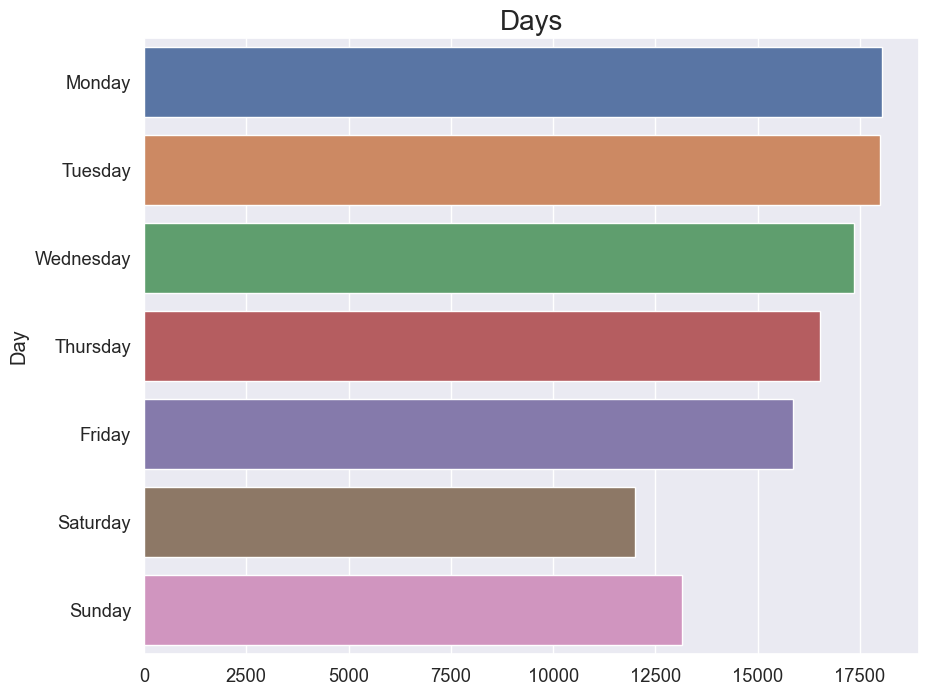

In [106]:
day = df.groupby('Day', observed=False).size().sort_values()

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=day.index, x=day.values)
plt.title('Days',fontsize=20)

### Pertanyaan 2:

- apa saja kategori produk yang paling diminati customer brazil?

Berdasarkan data yang tersedia, kami dapat menyimpulkan 10 kategori produk teratas di sektor e-commerce di Brasil. Berikut daftarnya:
***
1. Tempat Tidur & Kamar Mandi
2. Kesehatan & Kecantikan
3. Olahraga & Rekreasi
4. Furnitur & Dekorasi
5. Komputer & Aksesori
6. Peralatan Rumah Tangga
7. Jam Tangan & Hadiah
8. Telepon
9. Alat-alat berkebun
10. Mobil
***
Kategori-kategori ini mewakili barang paling populer yang dibeli oleh konsumen di pasar e-commerce Brasil. Memahami kategori teratas ini dapat bermanfaat bagi bisnis e-commerce dalam menargetkan upaya pemasaran mereka, mengoptimalkan penawaran produk mereka, dan menyesuaikan strategi mereka untuk memenuhi permintaan konsumen secara efektif.

In [299]:
top_10_category = df["product_category_name_english"].value_counts().sort_values(ascending=False)[:10]

top_10_category

product_category_name_english
bed_bath_table           11649
health_beauty             9761
sports_leisure            8731
furniture_decor           8553
computers_accessories     7897
housewares                7172
watches_gifts             6063
telephony                 4601
garden_tools              4463
auto                      4283
Name: count, dtype: int64

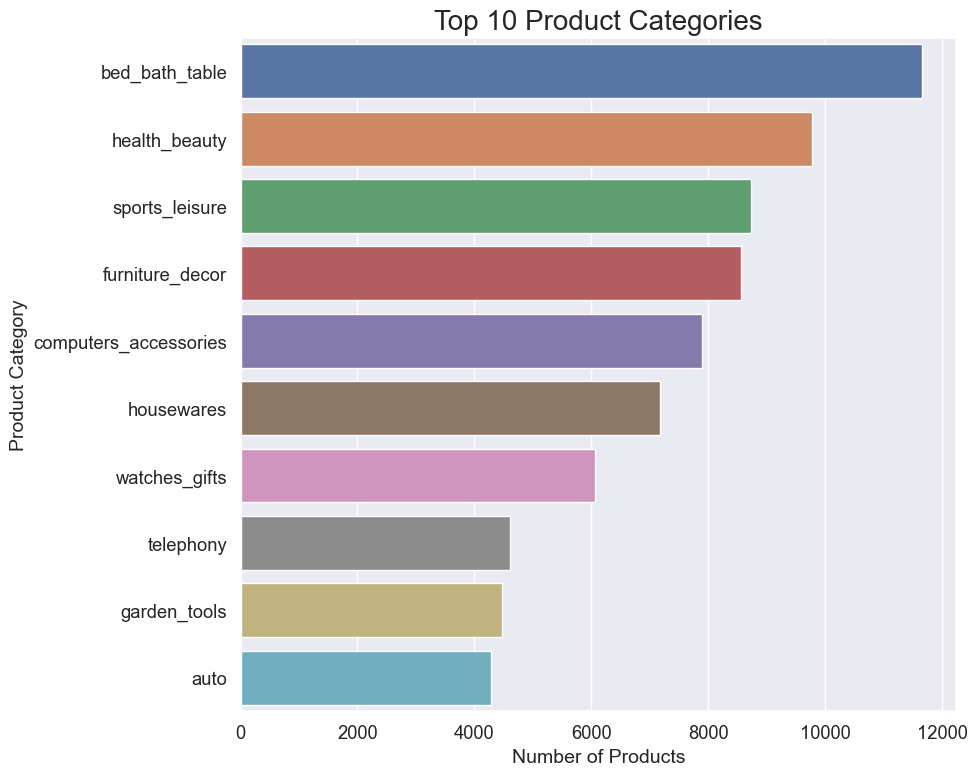

In [300]:
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")
sns.barplot(y=top_10_category.index, x=top_10_category.values, hue=top_10_category.index, dodge=False, legend=False)
plt.title('Top 10 Product Categories', fontsize=20)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.tight_layout()
plt.show()

### Pertanyaan 3:

- apa metode pembayaran paling favorit dan paling sedikit?

***metode pembayaran paling favorit adalah credit_card, dan yang paling sedikit digunakan adalah debit_card***

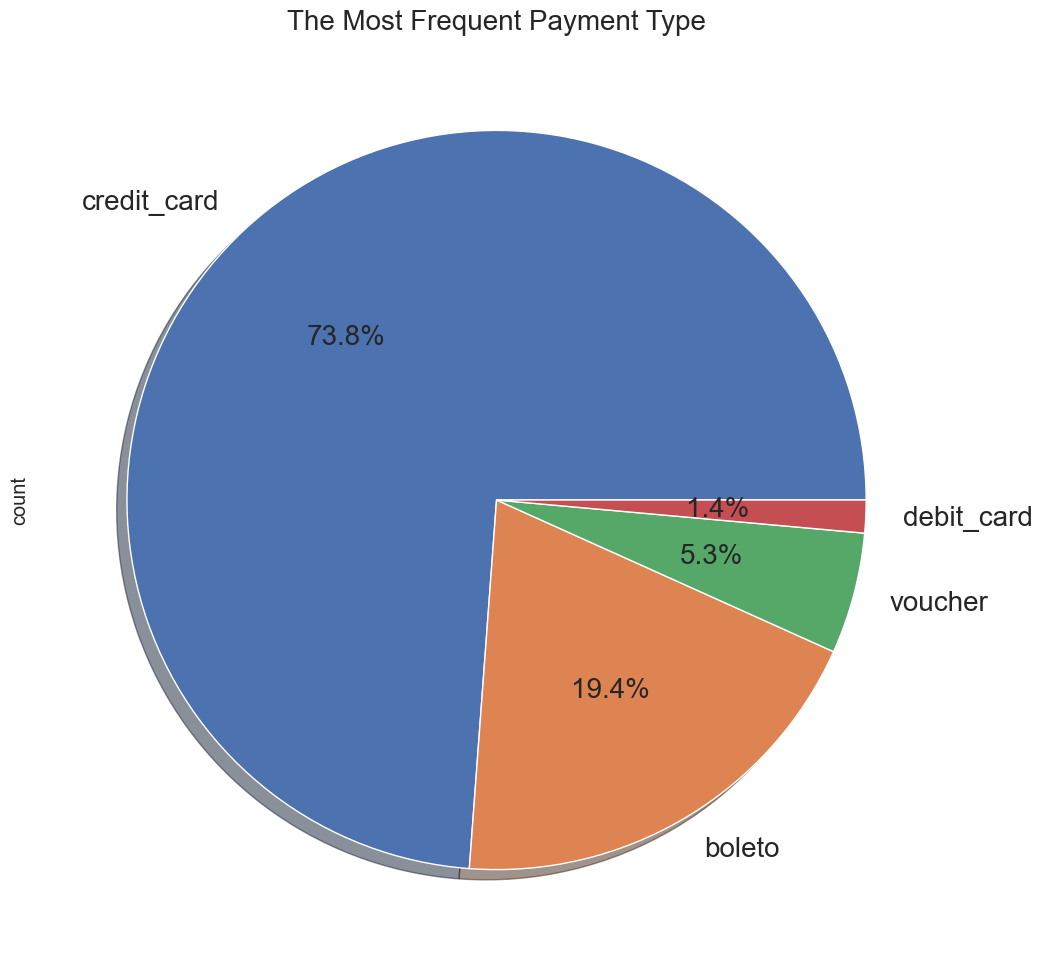

In [301]:
df["payment_type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(12,12),
    shadow=True
    
)
plt.title('The Most Frequent Payment Type'.title() , fontsize=20);

melihat perkembangan metode pembayaran setiap tahunnya

<Axes: xlabel='Year,payment_type'>

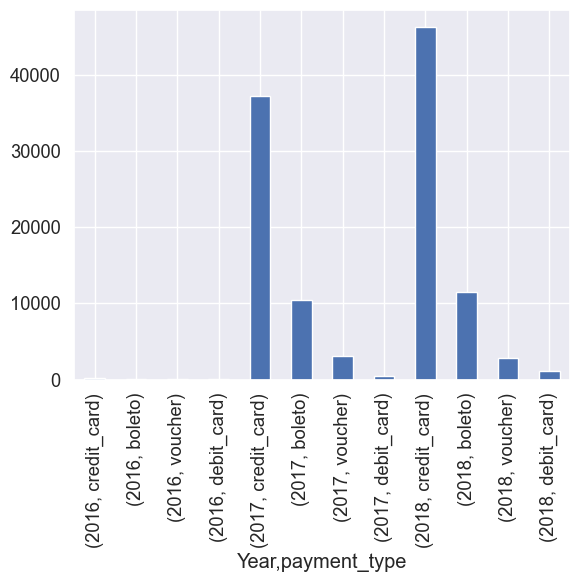

In [302]:
df.groupby("Year")['payment_type'].value_counts().plot(kind='bar')

## Conclusion

**pertanyaan 1:**

1. **Hari-hari Populer untuk Belanja Online**: Konsumen di Brasil cenderung lebih sering melakukan belanja online pada hari kerja dibandingkan dengan akhir pekan. Hal ini menunjukkan bahwa aktivitas belanja online lebih tinggi pada hari Senin hingga Jumat. Hal ini mungkin disebabkan oleh beberapa faktor seperti rutinitas harian, aksesibilitas internet selama jam kerja, dan penawaran khusus atau promosi yang sering dilakukan oleh penjual pada hari-hari tertentu.

2. **Diskon pada Hari Kerja**: Mengingat aktivitas belanja online yang tinggi pada hari kerja, penjual harus mempertimbangkan untuk mengadakan diskon atau promosi khusus pada hari-hari tersebut. Diskon yang ditawarkan pada hari kerja dapat mendorong konsumen untuk berbelanja lebih banyak dan memanfaatkan penawaran tersebut, meningkatkan volume penjualan dan meningkatkan keuntungan.

3. **Penambahan Barang**: Pada hari-hari tersibuk dalam seminggu, yaitu pada hari kerja (Senin hingga Jumat), penjual harus mempertimbangkan untuk menambah stok atau meningkatkan ketersediaan stok. Ini karena permintaan belanja online cenderung tinggi pada hari-hari tersebut. Dengan menyiapkan stok yang cukup, penjual dapat memastikan bahwa mereka dapat memenuhi permintaan konsumen dan memaksimalkan penjualan mereka.

Dengan mempertimbangkan faktor diskon di hari kerja, penjual dapat lebih efektif menarik perhatian konsumen dan meningkatkan penjualan mereka, sambil tetap memastikan ketersediaan stok yang memadai untuk memenuhi permintaan yang tinggi.

**pertanyaan 2:**

1. Bed & Bath
2. Health & Beauty
3. Sports & Leisure
4. Furniture & Decor
5. Computers & Accessories
6. Housewares
7. Watches & Gifts
8. Telephony
9. Garden Tools
10. Auto

Dari data ini, terlihat bahwa produk-produk untuk keperluan rumah tangga seperti perabotan tidur dan kesehatan & kecantikan menjadi yang paling diminati. Selanjutnya, produk-produk untuk aktivitas olahraga & rekreasi, furnitur & dekorasi rumah, serta aksesori komputer juga cukup diminati oleh pelanggan di Brasil.

Dengan mengetahui kategori produk yang paling diminati oleh pelanggan, penjual dapat mengarahkan strategi pemasaran dan manajemen stok mereka untuk memaksimalkan penjualan dan keuntungan. Ini bisa meliputi penawaran promosi khusus, pengembangan produk baru, atau peningkatan ketersediaan stok untuk kategori produk yang diminati.


***pertanyaan 3:***

***metode pembayaran paling favorit adalah credit_card, dan yang paling sedikit digunakan adalah debit_card***, dikarenakan faktor kemudahan dan kepuasan sesaat

output file csv

In [304]:
df.to_csv('e_commerce.csv', index=False)